## LBVAR Adaptive

 Adaptive LBVAR 모형에 대한 자세한 설명은 `manual/LBVAR Adaptive.md` 참고.

### 데이터 불러오기: 분기별 거시경제변수 데이터, 항목은 아래 `df.info()` 결과에서 참고.

In [1]:
import pandas as pd

In [2]:
# large 데이터 로드
# df = pd.read_excel("data/Differed_Data.xlsx", index_col=0) ##
df = pd.read_excel("../data/Differed_Data_Selected.xlsx", index_col=0) ##

# 일부 컬럼만 사용 (138개 중)
col_limit = 10
df = df.iloc[:, :col_limit]

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2000-03-01 to 2023-12-01
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nominal_GDP          96 non-null     float64
 1   Total_Save           96 non-null     float64
 2   Household_Spending   96 non-null     float64
 3   Government_Spending  96 non-null     float64
 4   Foreign_Store        96 non-null     float64
 5   GDP_Deflator         96 non-null     float64
 6   Dollor_Won           96 non-null     float64
 7   Call                 96 non-null     float64
 8   Treasury_Bond        96 non-null     float64
 9   PPI                  96 non-null     float64
dtypes: float64(10)
memory usage: 8.2 KB


,Nominal_GDP,Total_Save,Household_Spending,Government_Spending,Foreign_Store,GDP_Deflator,Dollor_Won,Call,Treasury_Bond,PPI
Time,,,,,,,,,,
2000-03-01,15.364291,14.268692,15.159773,13.792548,59.403704,4.271157,7.007678,4.981847,8.939529,4.331653
2000-06-01,15.379320,14.304766,15.162181,13.823710,62.638977,4.271062,7.010601,5.036268,8.740849,4.326303
2000-09-01,15.402900,14.328262,15.162124,13.911984,63.234487,4.279456,7.033930,5.127937,8.204702,4.331350
2000-12-01,15.390514,14.292919,15.149745,13.830700,66.431507,4.291200,7.066415,5.356287,7.313966,4.336247
2001-03-01,15.405731,14.300737,15.171157,13.872958,69.774888,4.303751,7.131962,5.167332,5.635832,4.331585


`bok_da` 시계열분석 패키지 `ts`의 `lbvar` 모듈에서 `LBVAR_Adaptive` 클래스를 불러온 후, `model` 객체를 생성한다.

In [4]:
from bok_da.ts.lbvar import LBVAR_Adaptive

model = LBVAR_Adaptive(p=4, ndraws=3000, burnin=1000, verbose=True)

> Initializing Model...
  - Trend: 1
  - p(lag): 4
  - Number of Draws: 3000
  - Burn-in: 1000
  - Verbose: True


`model`의 `fit()` 메서드를 이용해서 모형을 추정할 수 있다.

In [5]:
model.fit(df)

> Prior Making (Adaptive)
> Posterior Draw (Adaptive)


100%|██████████| 4000/4000 [00:59<00:00, 67.63it/s]


`Draw.variable_summary()` 메서드를 통해 모형파라미터의 요약 정보를 볼 수 있다.

In [6]:
model.Draw.variable_summary()

added | variable | type    |   size(KB) | info
---------------------------------------------------
    1 | theta_i | list    |      0.180 | length=10
    2 | h_i     | list    |      0.180 | length=10
    3 | psi_i   | list    |      0.180 | length=10
    4 | u       | list    |      0.180 | length=10
    5 | kappa_1 | ndarray |      0.109 | shape=(3000,)
    6 | kappa_2 | ndarray |      0.109 | shape=(3000,)
    7 | nu_p    | ndarray |      0.109 | shape=(3000,)
    8 | h_0     | ndarray |      0.125 | shape=(10, 3000)
    9 | sigma_h | ndarray |      0.125 | shape=(10, 3000)


`model`의 `forecast()` 메서드를 통해 예측을 수행한다. 예측기간에 대한 인자는 `forecast_period=`로 설정한다. 예측결과 `forecast_results`의 `Mean` 메서드를 통해 예측치의 사후평균을 구한다.

In [7]:
forecast_results = model.forecast(forecast_period=4)

# 예측 결과 확인
print(forecast_results.Mean)

> Forecast Start
> Reduced Transform


100%|██████████| 3000/3000 [00:00<00:00, 10789.67it/s]


> Forecasting


100%|██████████| 3000/3000 [00:00<00:00, 14841.84it/s]

> Done
[[ 16.09181473  15.01477453  15.77886671  14.85298283  98.28687111
    4.73555166   7.21598519   3.34819997   3.4132835    4.77384032]
 [ 16.09324911  15.01716607  15.78122232  14.86719409  99.0646966
    4.73878855   7.23753938   3.10070283   3.26307083   4.77807685]
 [ 16.09611958  15.02075371  15.78397101  14.87972066 100.07813877
    4.74257311   7.25877103   2.84431501   3.12054267   4.78079929]
 [ 16.09808182  15.02415591  15.78558792  14.88879174 101.07059673
    4.74620302   7.27659943   2.58540593   2.97363568   4.7822541 ]]


`print_forecast` 메서드를 이용해 예측결과를 plot한다.

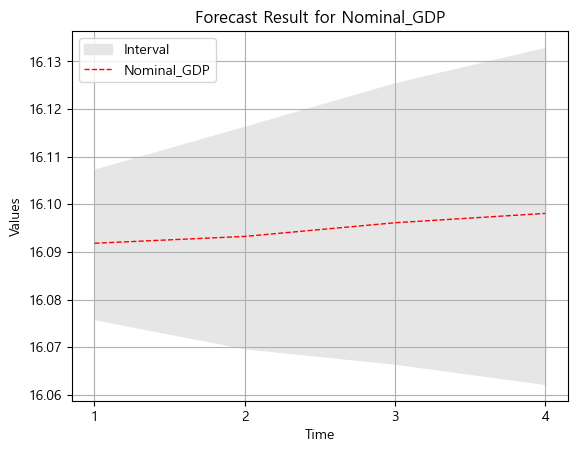

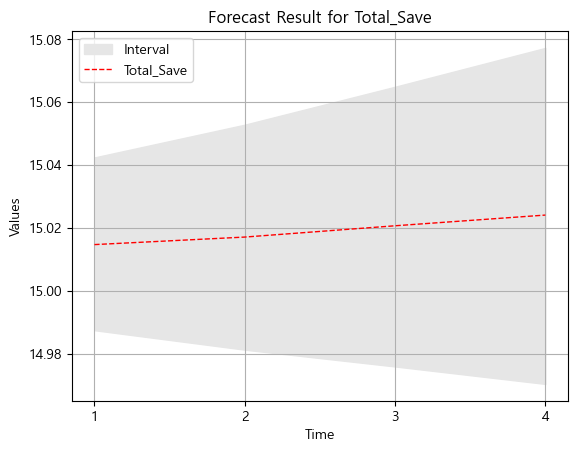

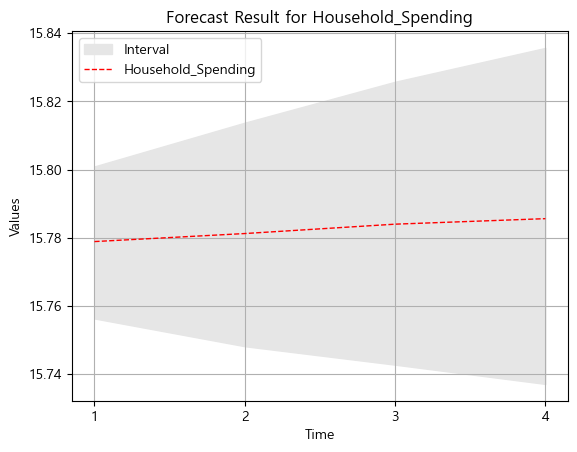

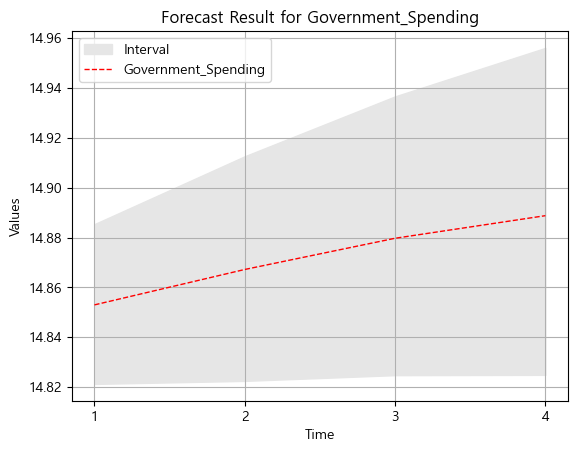

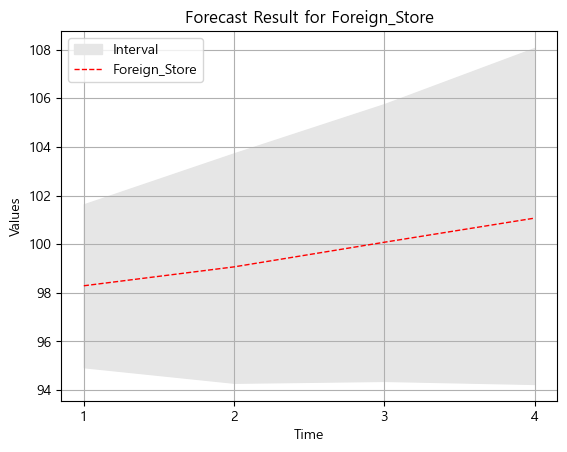

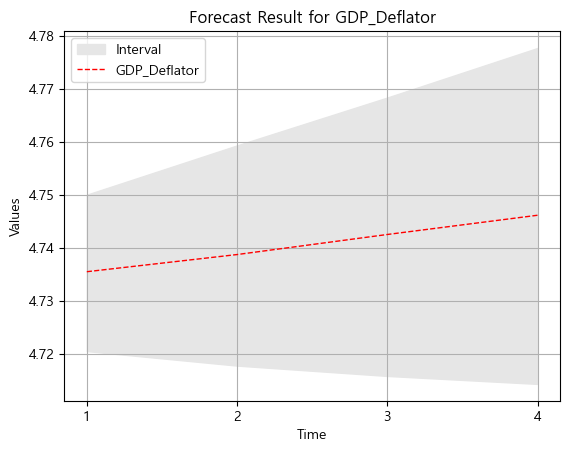

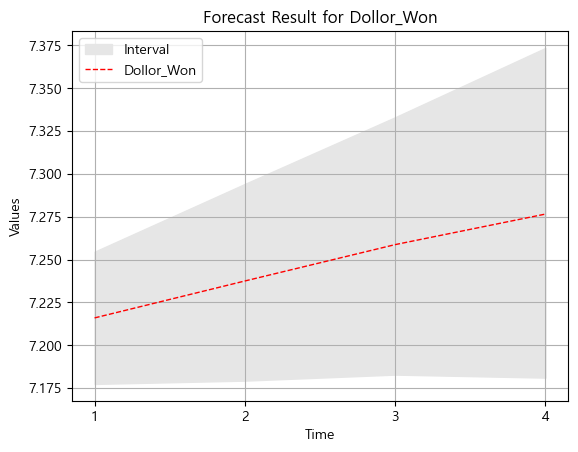

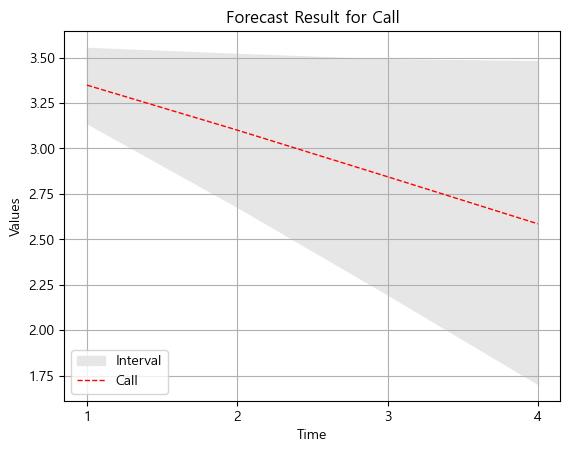

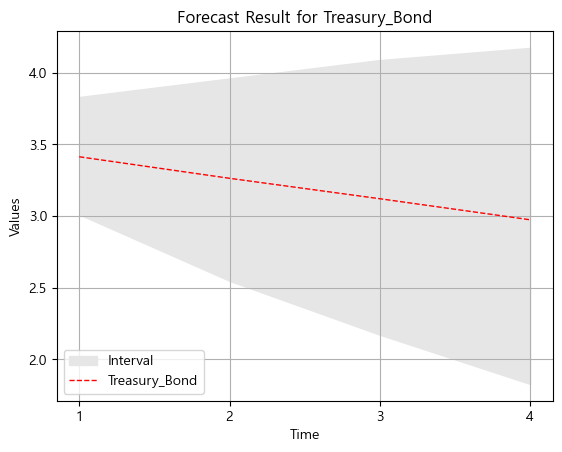

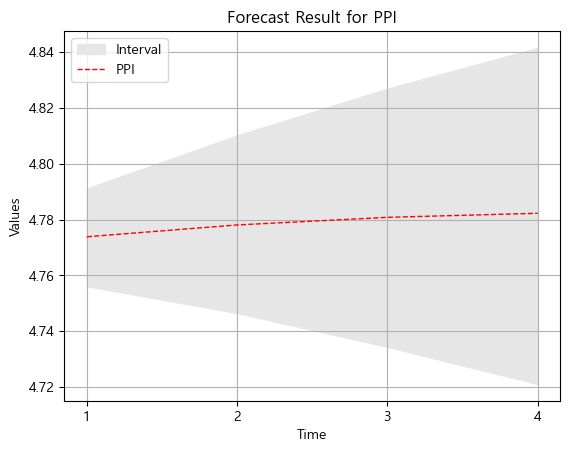

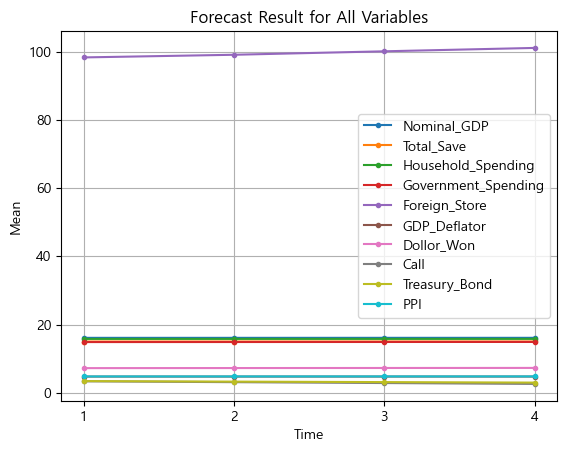

In [8]:
model.print_forecast(column_names=df.columns)